In [5]:
# Connect to (or create) the database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data into the table
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 20, 1.0),
    ('Orange', 15, 1.8),
    ('Apple', 5, 2.5),
    ('Banana', 10, 1.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [9]:

query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue,
    AVG(price) AS avg_price,
    COUNT(*) AS transactions
FROM sales 
GROUP BY product
"""


df = pd.read_sql_query(query, conn)
print(df)


  product  total_qty  revenue  avg_price  transactions
0   Apple         45    112.5        2.5             6
1  Banana         90     90.0        1.0             6
2  Orange         45     81.0        1.8             3


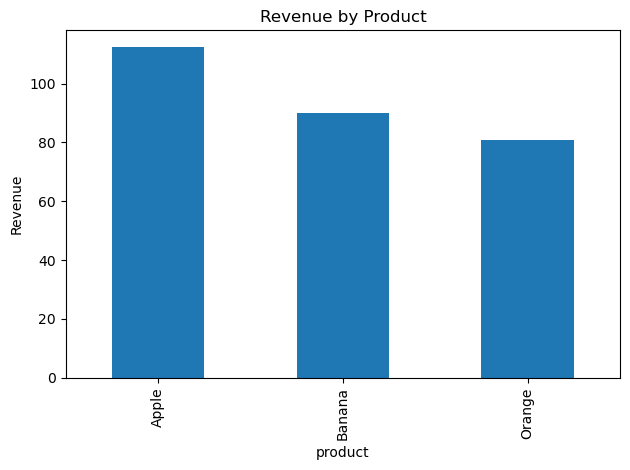

In [10]:
import matplotlib.pyplot as plt
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: saves the chart as a PNG file
plt.show()
